# Loading a Pretrained Model

Demonstrate how to load a model for immediate use or for transfer learning

Note the custom preprocessing

In [1]:
from keras.applications import VGG19
from keras.applications.vgg19 import decode_predictions, preprocess_input
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import requests
from io import BytesIO


Using TensorFlow backend.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 432x288 with 0 Axes>

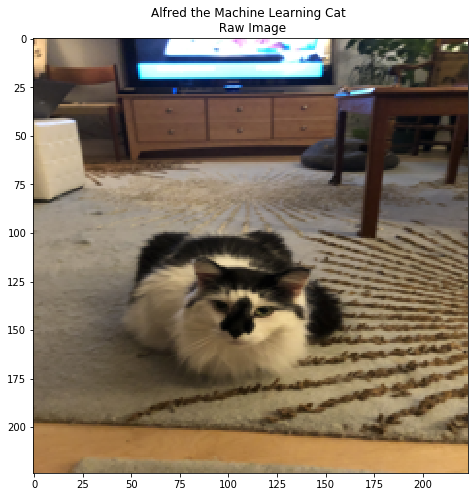

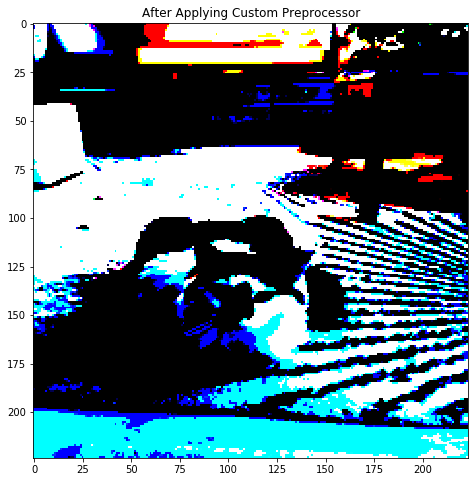

<Figure size 432x288 with 0 Axes>

In [11]:

img = Image.open("alfred.jpg").resize((224,224))
img = img.rotate(-90)   # this particular image needs to be rotated
 
# Images have integer values from 0 to 255 for each color.
# VGG expects floating points with a different range
# use their provided function to 
x=preprocess_input(np.array(img))    # note - convert PIL.Image to numpy array first

# VGG19 expects batches of images.   We are passing in a batch of 1 and need to reshape the array
x=np.reshape(x, (1,224,224,3))  

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.title("Alfred the Machine Learning Cat \n Raw Image")
plt.figure(figsize=(10,8))
plt.title("After Applying Custom Preprocessor")

# we display the zeroth image in our array (of a single image)
# It appears VGG expects BGR images rather than RGB 
plt.imshow(x[0])  
plt.figure()



In [3]:
# load the pretrained VGG19 network 
# this defines the structure/architecture of the network 
# and by default also includes all the pre-trained weights and biases

vgg19=VGG19()

# show the model structure
# vgg19.summary()


In [17]:
# compiling a model is optional and only needed if we were doing training
# we are doing 'inference', so we can skip it, but it would do no harm
#vgg19.compile(loss='categorical_crossentropy', optimizer='adam')
y = vgg19.predict(x)
decode_predictions(y)


[[('n02123394', 'Persian_cat', 0.22787353),
  ('n02086079', 'Pekinese', 0.16156788),
  ('n02085782', 'Japanese_spaniel', 0.1532955),
  ('n02112018', 'Pomeranian', 0.05494285),
  ('n02112350', 'keeshond', 0.03216181)]]

In [19]:
# the output y is a batch of results even though we have only one image
# so it's an array of results for each image.   Each result is an array of tuples
# each tuple is an index (from ImageNet), a human readable label and the score from 0 to 1 for the label

# the label for the top guess for the first image is 

decode_predictions(y)[0][0][1]

'Persian_cat'

In [30]:
# wrap this into a function that is passed a URL directly to an image 

def whatIsThatURL(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((224,224))
    img_array = np.array(img)
    x = preprocess_input(img_array)
    x = np.reshape(x, (1,224,224,3))
    y = vgg19.predict(x)
    preds = decode_predictions( y )
    top = preds[0][0][1]
    percent = preds[0][0][2]*100
    return "Best guess is: {} percent: {:2.2f} ".format(top, percent)
    
url = 'https://i.imgur.com/RZzfCve.jpg'    
whatIsThatURL(url)

'Best guess is: racer percent: 53.37 '

In [32]:
whatIsThatURL('https://media.gettyimages.com/photos/-picture-id128114075?s=612x612')

'Best guess is: gorilla percent: 99.85 '